In [1]:
import pandas as pd;
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
file_data = pd.read_csv('mushrooms.csv')
file_data.info()
file_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


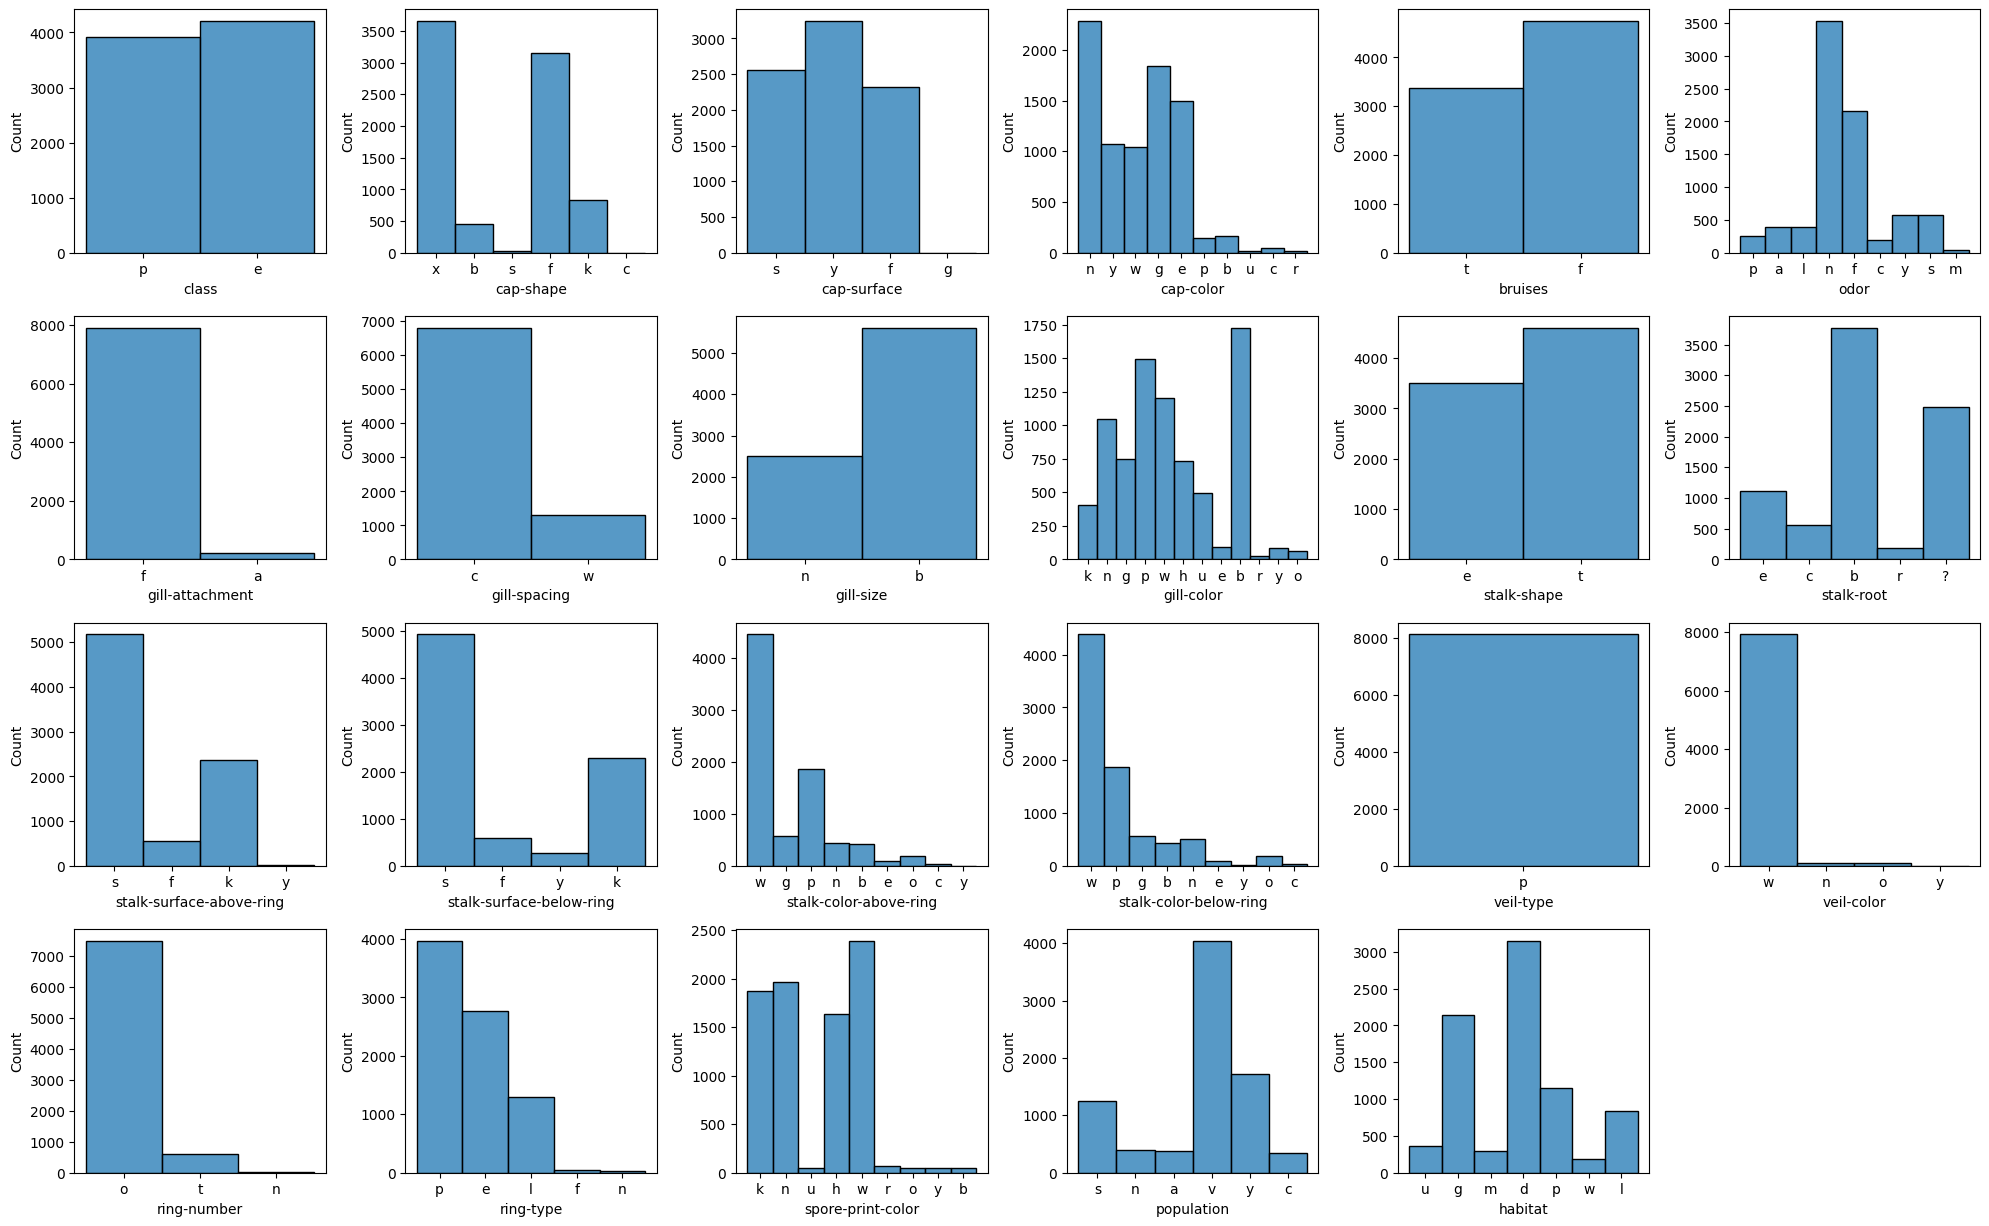

In [3]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in file_data:
    if plotnumber <= 23:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(file_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in file_data.columns:
    file_data[column] = le.fit_transform(file_data[column])

file_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
x = file_data.drop(["class", "veil-type"], axis = 1)
y = file_data['class']

In [20]:
select_featuresKBest = SelectKBest()
getKBest = select_featuresKBest.fit(x, y)

dfscores = pd.DataFrame(getKBest.scores_)
dfcolumns = pd.DataFrame(x.columns)

featuresScore = pd.concat([dfcolumns, dfscores], axis=1)
featuresScore.columns = ['specs', 'score']

print(featuresScore.nlargest(15, 'score'))

                       specs        score
7                  gill-size  3343.700439
8                 gill-color  3182.110596
3                    bruises  2729.510254
17                 ring-type  1658.307007
10                stalk-root  1365.373901
6               gill-spacing  1121.971924
11  stalk-surface-above-ring  1023.906250
12  stalk-surface-below-ring   796.237427
19                population   795.558777
20                   habitat   402.052460
16               ring-number   391.206696
1                cap-surface   267.136200
18         spore-print-color   247.489716
13    stalk-color-above-ring   197.297867
14    stalk-color-below-ring   178.710388


In [21]:
features_best = ['gill-size', 'gill-color', 'bruises', 'ring-type', 'stalk-root', 'gill-spacing', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'population',
                    'habitat',  'ring-number', 'cap-surface', 'spore-print-color', 'stalk-color-above-ring', 'stalk-color-below-ring']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
train_x_features = x_train[features_best]
test_x_features = x_test[features_best]
print("Train dataset shape: ", train_x_features.shape )
print("Test dataset shape: ", test_x_features.shape )

Train dataset shape:  (5686, 15)
Test dataset shape:  (2438, 15)


In [23]:
from sklearn.tree import DecisionTreeClassifier

dtScores = []

for i in range(1, 11):
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    dt.fit(train_x_features, y_train)
    dtScores.append(dt.score(test_x_features, y_test))

print(dtScores)

[0.7264150943396226, 0.9134536505332239, 0.9626743232157506, 0.9528301886792453, 0.9749794913863823, 0.9840032813781788, 1.0, 1.0, 1.0, 1.0]


[Text(0.25, 0.9375, 'x[1] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2972, 2714]'),
 Text(0.19117647058823528, 0.8125, 'entropy = 0.0\nsamples = 1193\nvalue = [0, 1193]'),
 Text(0.3088235294117647, 0.8125, 'x[12] <= 1.5\nentropy = 0.923\nsamples = 4493\nvalue = [2972, 1521]'),
 Text(0.11764705882352941, 0.6875, 'x[4] <= 0.5\nentropy = 0.335\nsamples = 1178\nvalue = [73, 1105]'),
 Text(0.058823529411764705, 0.5625, 'entropy = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.17647058823529413, 0.5625, 'entropy = 0.0\nsamples = 1105\nvalue = [0, 1105]'),
 Text(0.5, 0.6875, 'x[0] <= 0.5\nentropy = 0.545\nsamples = 3315\nvalue = [2899, 416]'),
 Text(0.29411764705882354, 0.5625, 'x[12] <= 4.5\nentropy = 0.178\nsamples = 2792\nvalue = [2717, 75]'),
 Text(0.23529411764705882, 0.4375, 'entropy = 0.0\nsamples = 2308\nvalue = [2308, 0]'),
 Text(0.35294117647058826, 0.4375, 'x[4] <= 0.5\nentropy = 0.622\nsamples = 484\nvalue = [409, 75]'),
 Text(0.29411764705882354, 0.3125, 'entropy = 0.0\nsam

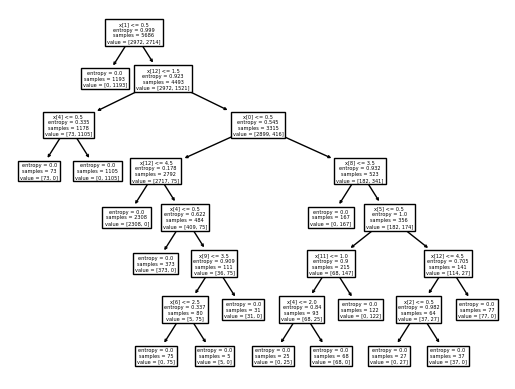

In [24]:
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7)
dt.fit(train_x_features, y_train)

tree.plot_tree(dt)

In [25]:
model_params = {
    'neural networks': {
        'model': MLPClassifier(),
        'params' : {
            'solver':['lbfgs', 'sgd', 'adam'],
            'max_iter': [100, 200, 300, 400, 500]
        }
    },
    'boosting' : {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [5,10,30,50,100,150,200]
        }
    },
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,2,3,5,10,20,30],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'k-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(train_x_features, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
datagrid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
datagrid

In [27]:
svm = SVC(kernel='poly', C=1)
svm.fit(train_x_features, y_train)
svm.score(test_x_features, y_test)

0.9942575881870386

In [28]:
nnmlp = MLPClassifier(solver='lbfgs', max_iter=300)
nnmlp.fit(train_x_features, y_train)
nnmlp.score(test_x_features, y_test)

1.0

In [29]:
gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(train_x_features, y_train)
gbc.score(test_x_features, y_test)

1.0

In [30]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_x_features, y_train)
knn.score(test_x_features, y_test)

0.994667760459393